<center><h1> Supermarket Sales Exploratory Data Analysis </h1></center>

---------------------------------------------------------------------------------------------------------------------------

### Context

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded data in 3 different branches for 3 months data.

### Data Dictionary

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)
<br>
Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

---------------------------------------------------------------------------------------------------------------------------

### Libraries

In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import calmap #calendar heatmap library

### Task 1: Initial Data Exploration

In [29]:
#load dataset

data = pd.read_csv('supermarket_sales.csv')

In [30]:
#display dataset

data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [31]:
#check columns

data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [32]:
#check data types

data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [33]:
#change data type of date
# Ensure 'Date' column is in datetime format
try:
    # Specify the format if known, e.g., format='%Y-%m-%d'
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Use errors='coerce' to handle invalid dates

    # Check for any NaT values after conversion
    if data['Date'].isnull().any():
        print("Warning: Some dates could not be converted and are set to NaT.")

    # Set 'Date' as the index of the DataFrame
    data.set_index('Date', inplace=True)

except Exception as e:
    print(f"An error occurred: {e}")

# Display the modified DataFrame (optional)
print(data)

             Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   
...                 ...    ...        ...           ...     ...   
2019-02-22  347-56-2442      A     Yangon        Normal    Male   
2019-02-18  849-09-3807      A     Yangon        Member  Female   
2019-02-18  849-09-3807      A     Yangon        Member  Female   
2019-03-10  745-74-0715      A     Yangon        Normal    Male   
2019-01-26  452-04-8808      B   Mandalay        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                             

/var/folders/c9/p6wl5bvs1f74h5jwfjjg7z580000gn/T/ipykernel_75080/1070049987.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Use errors='coerce' to handle invalid dates


In [7]:
#summary statistics

data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,8.886215e-16,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


### Task 2: Univariate Analysis

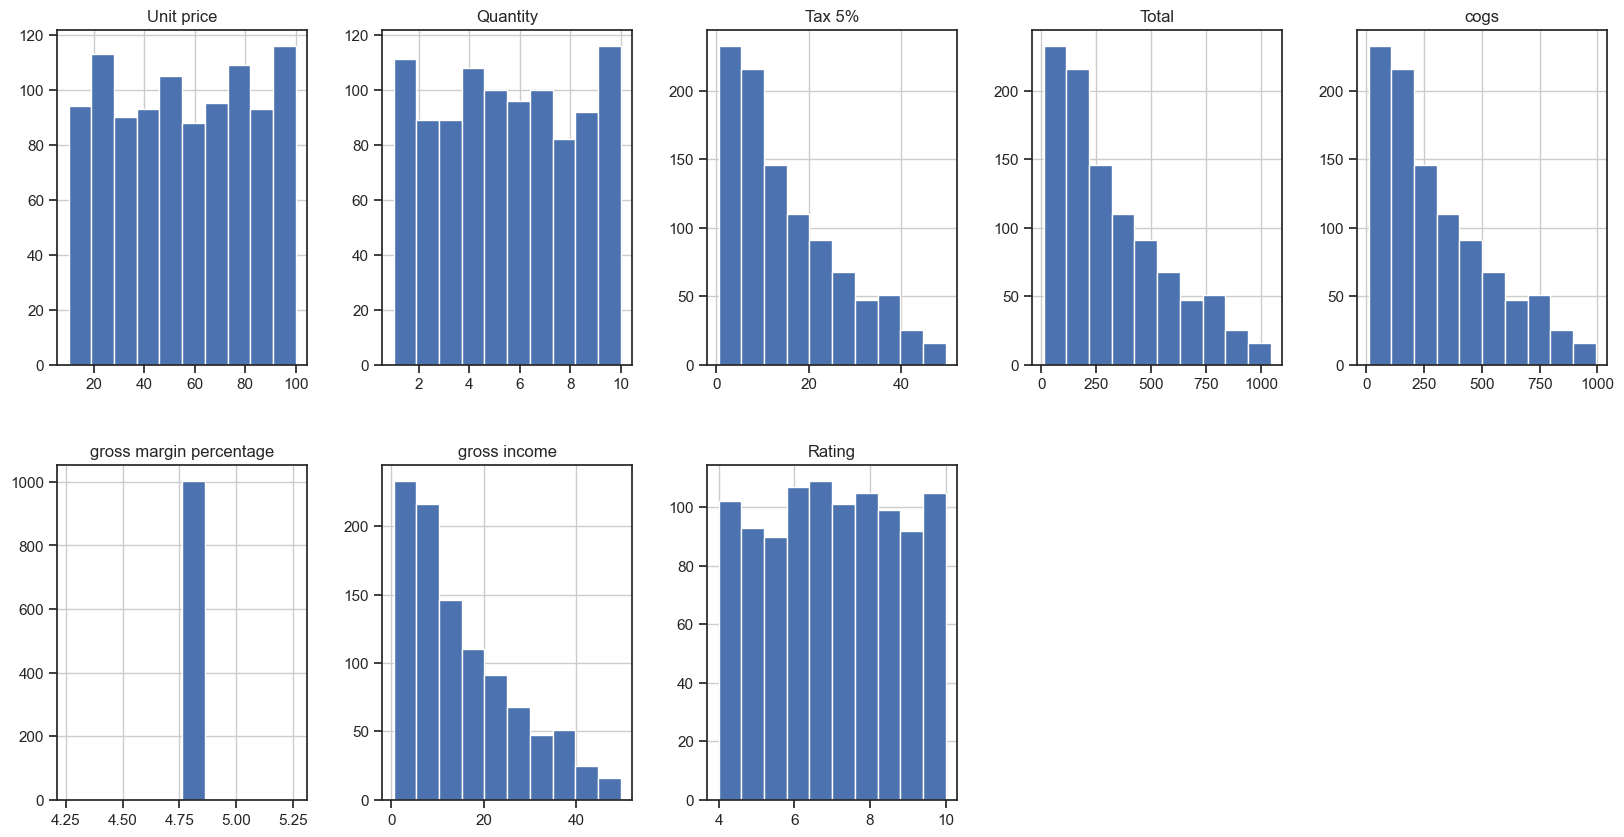

In [52]:
#plot all distributions

data.hist(figsize = (20,10), layout = (2,5))
plt.show()

**Question 1:** What does the distribution of the rating looks like? Is it skewed?

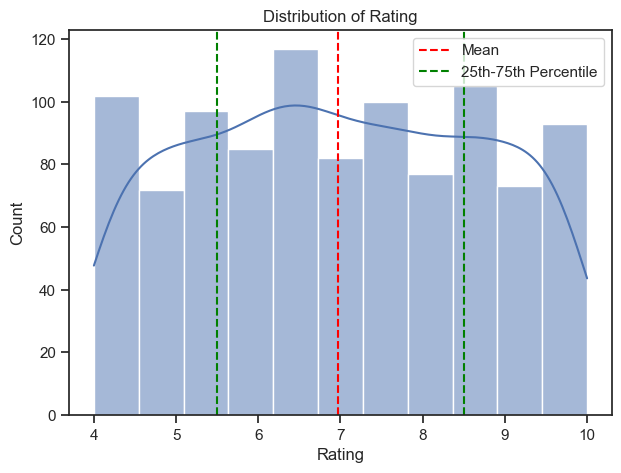

In [60]:
#configure
sns.set(rc = {'figure.figsize':(7,5)}, style = 'ticks')

#plot
sns.histplot(data['Rating'],kde=True)

plt.title('Distribution of Rating')
plt.axvline(x= np.mean(data['Rating']), color = 'red', linestyle = "--", label = 'Mean')
plt.axvline(x= np.percentile(data['Rating'],25), color = 'green', linestyle = "--", label = '25th-75th Percentile')
plt.axvline(x= np.percentile(data['Rating'],75), color = 'green', linestyle = "--")


plt.legend(loc = 'upper right')
plt.show()

The distribution in customer ratings looks relatively uniformed and it doesn't seemed to be skewed in the left or right direction 

**Question 2:** Do aggregate sales numbers differ by much between branches?

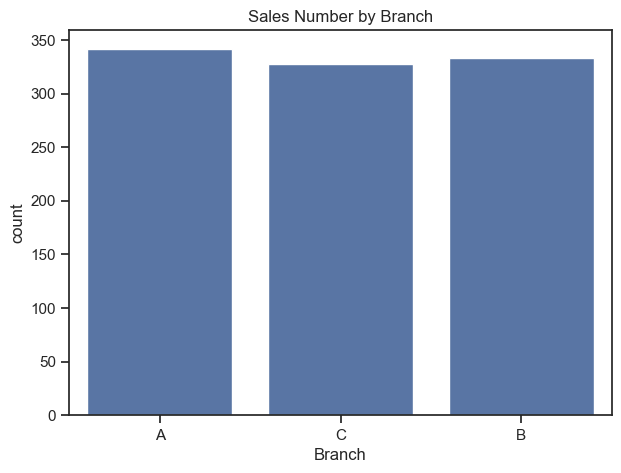

In [10]:
sns.countplot(x =data['Branch'])

plt.title('Sales Number by Branch')
plt.show()

The sales number is almost the same per branch

**Question 3:** What is the most popular form of payment?

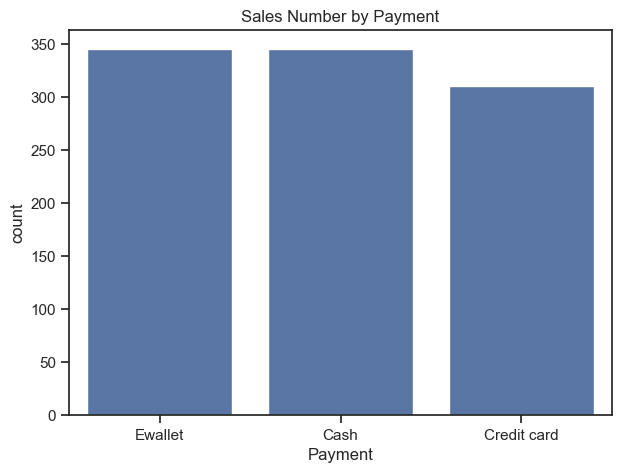

In [11]:
sns.countplot(x =data['Payment'])

plt.title('Sales Number by Payment')
plt.show()

E-wallet seems to be the most popular form of payment followed by Cash while Credit Card seems to be the least popular form of making payments from customers

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

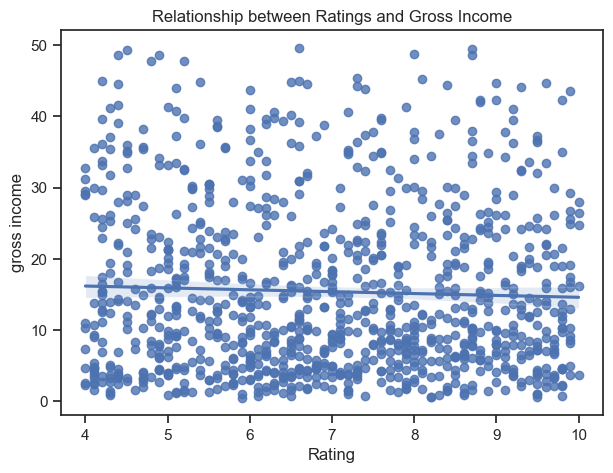

In [12]:
sns.regplot(x = data['Rating'], y = data['gross income'])

plt.title('Relationship between Ratings and Gross Income')
plt.show()

The trendline is flat and there seems to be no linear relationship between ratings and gross income

**Question 4:** Is there a relationship between branch and gross income?

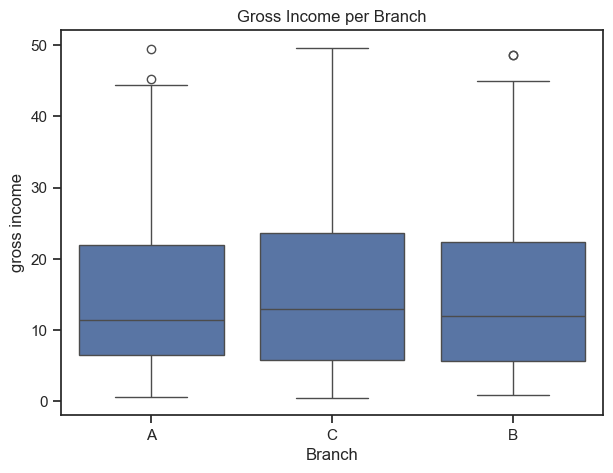

In [61]:
sns.boxplot(x = data['Branch'], y = data['gross income'])

plt.title('Gross Income per Branch')
plt.show()

There doesn't seem to have much variation between gross income across different branches.

**Question 5:** Is there a relationship between gender and gross income

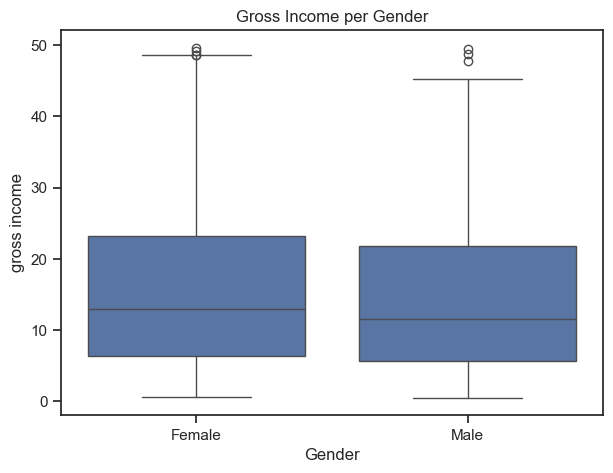

In [14]:
sns.boxplot(x = data['Gender'], y = data['gross income'])

plt.title('Gross Income per Gender')
plt.show()

On the 75th percentile, women spent just a little bit higher than men. But generally, it looks like men and women spent about almost the same on average. 

**Question 6:** Is there a noticeable time trend in gross income?

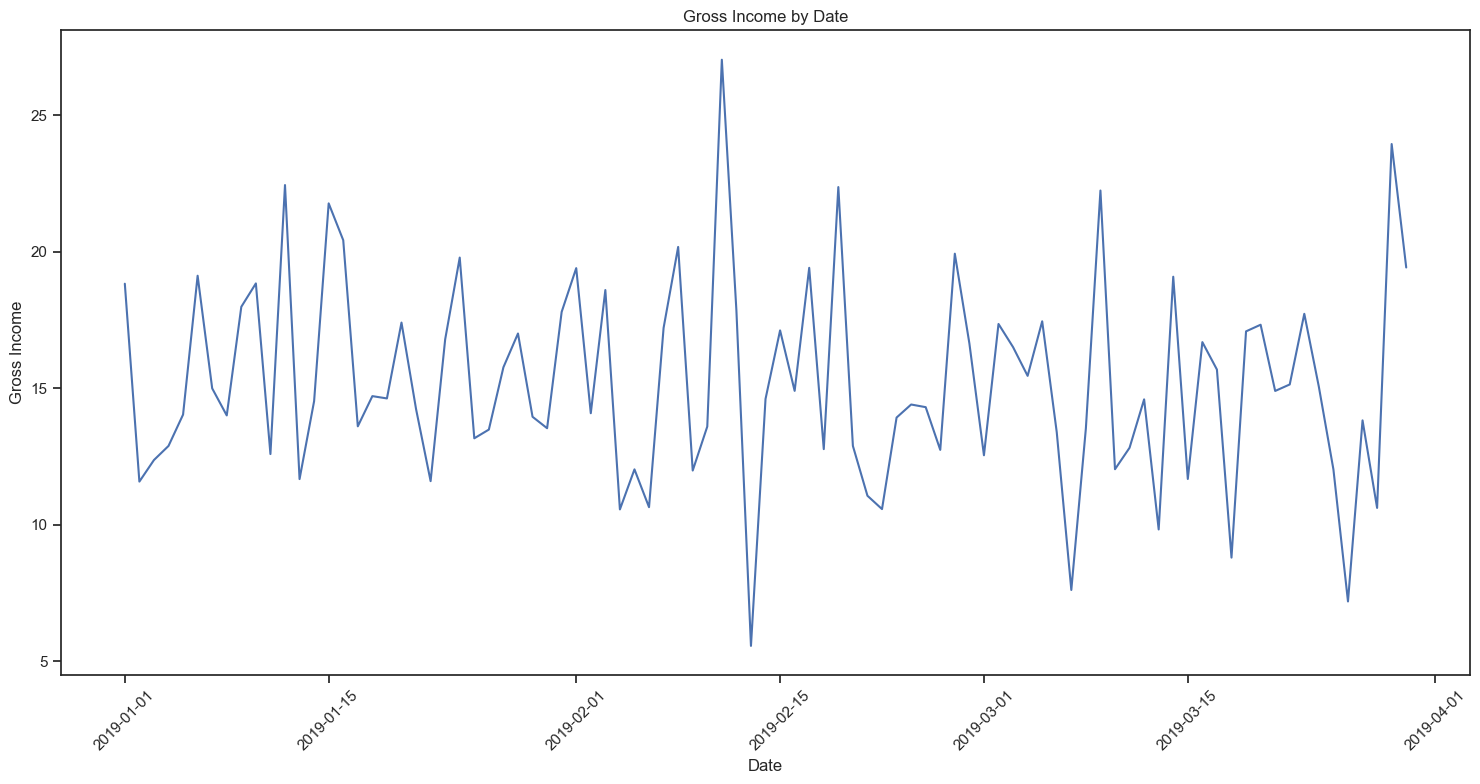

In [15]:
# Step 1: Ensure numeric columns
# Convert the 'gross income' column to numeric (if necessary)
data['gross income'] = pd.to_numeric(data['gross income'], errors='coerce')

# Step 2: Group data by date and calculate the mean
by_date = data.groupby(data.index).mean(numeric_only=True)

# Step 3: Configure the plot
sns.set(rc={'figure.figsize': (15, 8)}, style='ticks')

# Step 4: Plot the data
sns.lineplot(x=by_date.index, y=by_date['gross income'])

plt.title('Gross Income by Date')
plt.xlabel('Date')  # Add x-axis label
plt.ylabel('Gross Income')  # Add y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The data seems to have no noticeable time trend in the graph except for some days that has a very low and high income.

### Task 4: Dealing With Duplicate Rows and Missing Values

**Duplicate Rows**

In [16]:
#count duplicates

print(f'Number of duplicates: {data.duplicated().sum()}')

Number of duplicates: 3


In [17]:
#display duplicates

data[data.duplicated(keep = False)].sort_index()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8


In [18]:
data.drop_duplicates(inplace = True)
print(f'Number of duplicates: {data.duplicated().sum()}')

Number of duplicates: 0


**Missing Values**

In [19]:
#ratio of missing values

data.isnull().mean()

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

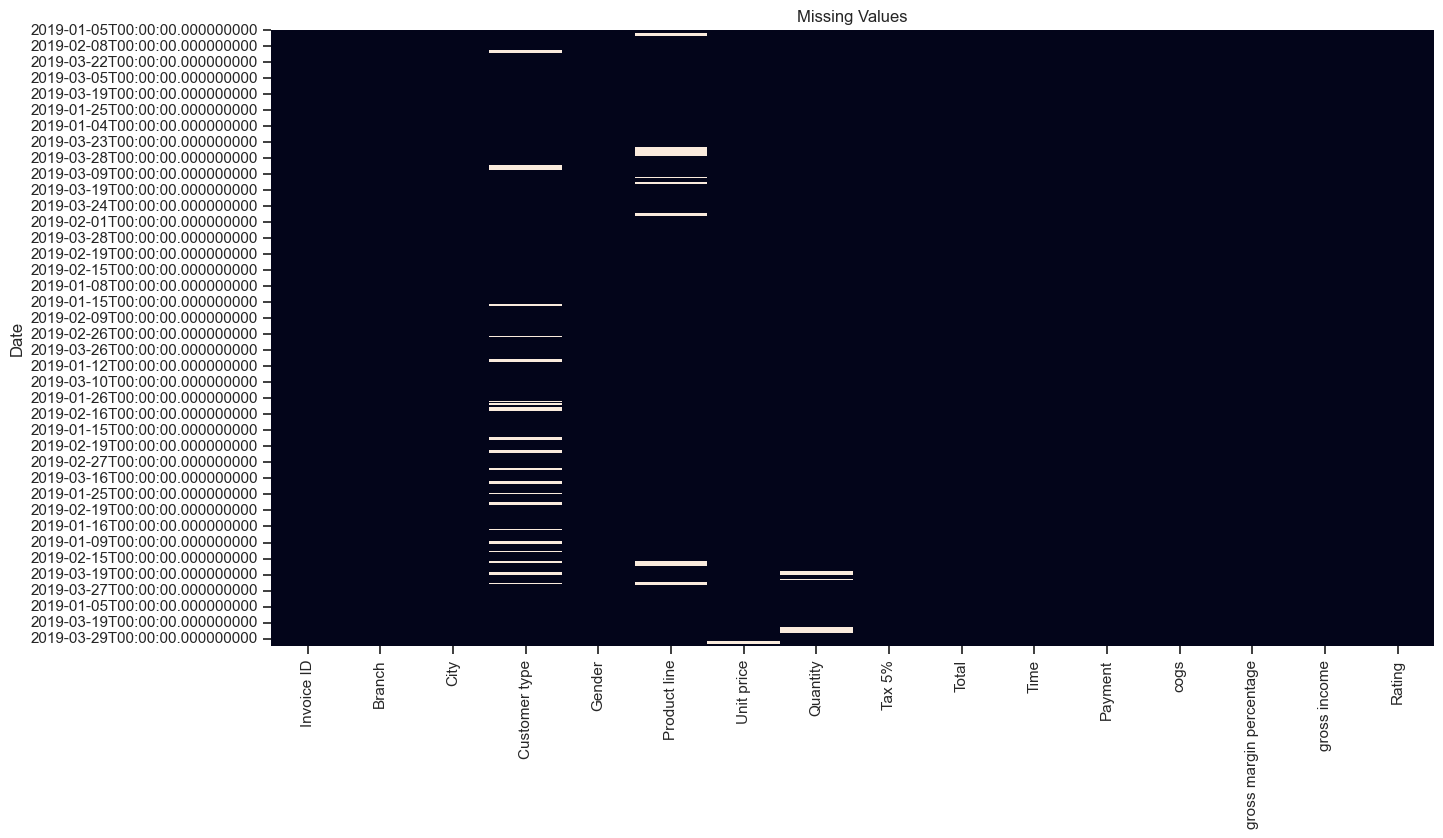

In [20]:
#plot missing values

sns.heatmap(data.isnull(), cbar = False)

plt.title('Missing Values')
plt.show()

In [21]:
#fill missing numerical data with mean

# Convert columns to numeric, coercing errors
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill NaN values with the mean of each column
data.fillna(data.mean(numeric_only=True), inplace=True)

# Print the DataFrame to verify
print(data)

            Invoice ID  Branch  City  Customer type  Gender  Product line  \
Date                                                                        
2019-01-05         NaN     NaN   NaN            NaN     NaN           NaN   
2019-03-08         NaN     NaN   NaN            NaN     NaN           NaN   
2019-03-03         NaN     NaN   NaN            NaN     NaN           NaN   
2019-01-27         NaN     NaN   NaN            NaN     NaN           NaN   
2019-02-08         NaN     NaN   NaN            NaN     NaN           NaN   
...                ...     ...   ...            ...     ...           ...   
2019-01-29         NaN     NaN   NaN            NaN     NaN           NaN   
2019-03-02         NaN     NaN   NaN            NaN     NaN           NaN   
2019-02-09         NaN     NaN   NaN            NaN     NaN           NaN   
2019-02-22         NaN     NaN   NaN            NaN     NaN           NaN   
2019-02-18         NaN     NaN   NaN            NaN     NaN           NaN   

In [22]:
#fill missing categorical data with mode

data.fillna(data.mode().iloc[0], inplace = True)

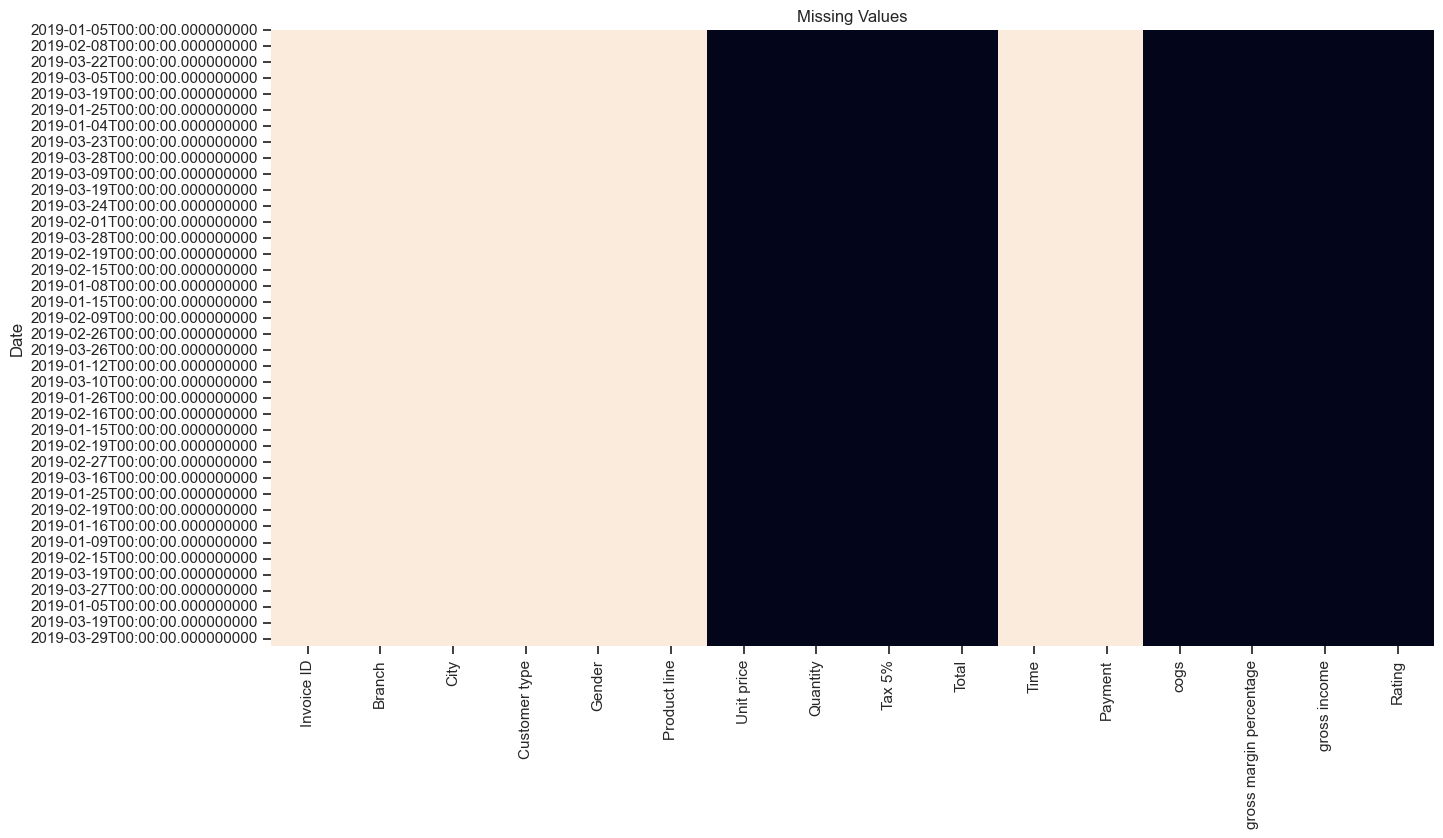

In [23]:
#verify that there are no missing values

sns.heatmap(data.isnull(), cbar = False)

plt.title('Missing Values')
plt.show()

### Task 5: Correlation Analysis

In [24]:
#correlation matrix

matrix = data[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']].corr()


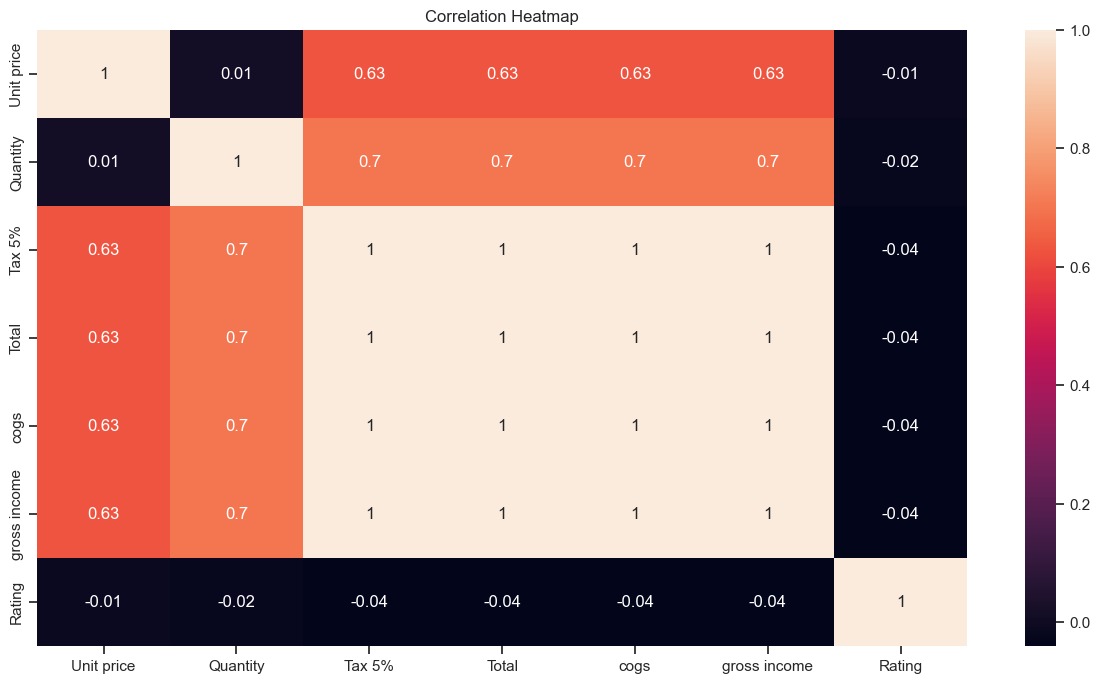

In [25]:
#correlation heatmap

sns.heatmap(data = np.round(matrix,2), annot = True)

plt.title('Correlation Heatmap')
plt.show()